### Función vs su serie de potencias 
#### Y el error aboluto de ambas, asi como el orden de su error...

In [9]:
#incluyo bibliotecas
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

#definiendo letra como simbolo matematico
x = sy.symbols('x')

#defino función mera mera
f = sy.sin(x)
#funcion que saca la serie de potencias de f alrededor de 0 con hasta 5 terminos
g=sy.series(f,x,0,5)

#da el orden del error
orden = g.getO()

#removemos el temino que estima la magnitud de error pues es un simbolo y quiero numeros
gx = g.removeO()

#Prints
print('Funcion:')
display(f)

print ('Serie de Taylor:')
display(g)

print('Pura O')
display(orden)

print ('Funcion sin O')
display(gx)


#usamos lambdify para convertir mis funciones simbolicas f y gx en funciones numericas 

ffunc = sy.lambdify(x,f)
gfunc = sy.lambdify(x,gx)

#ahora puedo evaluar valores numericos en ellas, ejemplo:
print('Valor de f evaluada en 3')
display(ffunc(3))
print ('Serie de Taylor de f evaluada en 3')
display(gfunc(3))


Funcion:


sin(x)

Serie de Taylor:


x - x**3/6 + O(x**5)

Pura O


O(x**5)

Funcion sin O


-x**3/6 + x

Valor de f evaluada en 0


0.1411200080598672

Serie de Taylor de f evaluada en 5


-1.5

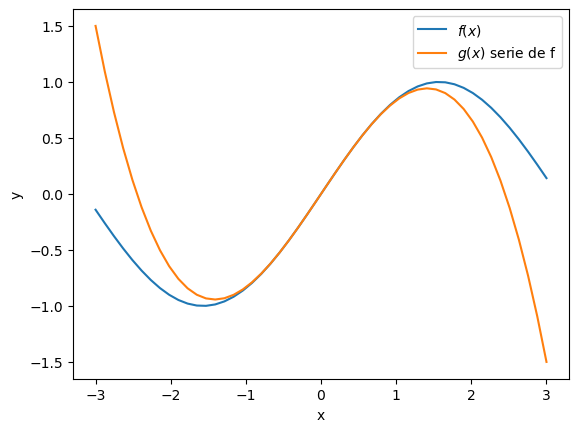

In [13]:
#Graficar las funciones
X=np.linspace(-3,3)
Yf=ffunc(X)
Yg=gfunc(X)
fig,ax=plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.plot(X,Yf)
plt.plot(X,Yg)
plt.legend(['$f(x)$','$g(x)$ serie de f'])
plt.show()

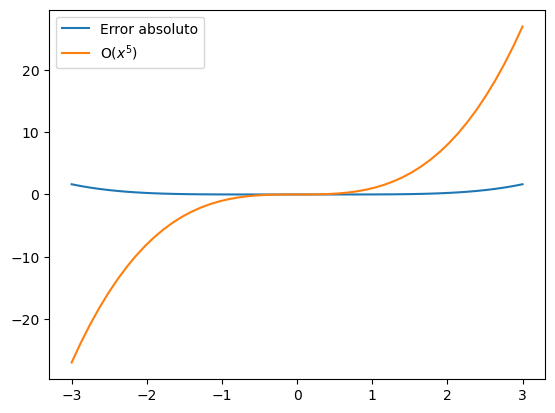

In [15]:
#Calculamos y graficamos el error absoluto de f-g vs el termino $O(x**5)$
Yerr=np.abs(Yf-Yg)
Yord=X**3
plt.plot(X,Yerr)
plt.plot(X,Yord)
plt.legend(['Error absoluto','O($x^5$)'])
plt.show()